In [ ]:
import keras
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import time
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#Reshape the training and test set
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#Padding the images by 2 pixels since in the paper input images were 32x32
X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

Y_test_post_train = Y_test

# convert digit labels (0-9) in one-hot encoded binary vectors. 
# These correspond to the training/test labels at the output of the net. 
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

print('Train: X=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, Y_test.shape))

Train: X=(60000, 32, 32, 1), y=(60000, 10)
Test: X=(10000, 32, 32, 1), y=(10000, 10)


In [ ]:
model = Sequential()
#Layer 1
#Conv Layer 1
model.add(Conv2D(filters = 6, 
                 kernel_size = 5, 
                 strides = 1, 
                 activation = 'relu', 
                 input_shape = (32,32,1)))
#Pooling layer 1
model.add(MaxPooling2D(pool_size = 2, strides = 2))
#Layer 2
#Conv Layer 2
model.add(Conv2D(filters = 16, 
                 kernel_size = 5,
                 strides = 1,
                 activation = 'relu',
                 input_shape = (14,14,6)))
#Pooling Layer 2
model.add(MaxPooling2D(pool_size = 2, strides = 2))
#Flatten
model.add(Flatten())
#Layer 3
#Fully connected layer 1
model.add(Dense(units = 120, activation = 'relu'))
#Layer 4
#Fully connected layer 2
model.add(Dense(units = 84, activation = 'relu'))
#Layer 5
#Output Layer
model.add(Dense(units = 10, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [ ]:
model.fit(X_train, Y_train, batch_size=100, epochs=50, 
          verbose=1, validation_data=(X_test, Y_test))

Epoch 1/50
600/600 [==============================] - 35s 58ms/step - loss: 0.0779 - accuracy: 0.9760 - val_loss: 0.0530 - val_accuracy: 0.9828
Epoch 2/50
600/600 [==============================] - 35s 58ms/step - loss: 0.0560 - accuracy: 0.9819 - val_loss: 0.0402 - val_accuracy: 0.9865
Epoch 3/50
600/600 [==============================] - 35s 58ms/step - loss: 0.0441 - accuracy: 0.9860 - val_loss: 0.0429 - val_accuracy: 0.9864
Epoch 4/50
600/600 [==============================] - 34s 57ms/step - loss: 0.0358 - accuracy: 0.9881 - val_loss: 0.0369 - val_accuracy: 0.9873
Epoch 5/50
600/600 [==============================] - 34s 57ms/step - loss: 0.0325 - accuracy: 0.9893 - val_loss: 0.0369 - val_accuracy: 0.9877
Epoch 6/50
600/600 [==============================] - 34s 57ms/step - loss: 0.0251 - accuracy: 0.9915 - val_loss: 0.0350 - val_accuracy: 0.9881
Epoch 7/50
600/600 [==============================] - 34s 57ms/step - loss: 0.0216 - accuracy: 0.9927 - val_loss: 0.0320 - val_accuracy:

In [ ]:
model.save('/content/drive/MyDrive/Project_Circuit_Design_Topic/Saved_model/50_epochs.model')
model.save('/content/drive/MyDrive/Project_Circuit_Design_Topic/Saved_model/50_epochs_h5.h5')
model.save_weights('/content/drive/MyDrive/Project_Circuit_Design_Topic/Saved_model/weights.h5')

In [ ]:
weights = model.get_weights()
np.savetxt('/content/drive/MyDrive/Project_Circuit_Design_Topic/Saved_model/weights.txt', weights ,fmt='%s')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Project_Circuit_Design_Topic/Saved_model/50_epochs.model')

In [ ]:
predictions = model.predict(X_test)

5


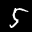

In [ ]:
number = np.argmax(predictions[779])
print(number)
cv2_imshow(X_test[779]*255)

Accuracy:  0.9914
Precision:  0.9913464509349778
Recall:  0.9912813922852411
F1:  0.991304215320506


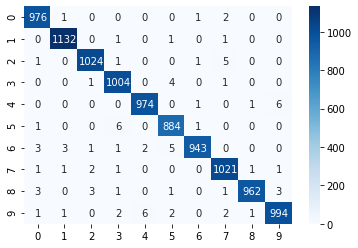

In [ ]:
# Confusion Matrix
y_pred = []
for i in range (0, 10000):
  pred = np.argmax(predictions[i])
  y_pred.append(pred)
print(Y_test_post_train.shape, len(y_pred))
cm = confusion_matrix(Y_test_post_train, y_pred)

df_cm = pd.DataFrame(cm, index = np.unique(Y_test_post_train), columns=np.unique(Y_test_post_train))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}, cmap='Blues', fmt="d")

accuracy = accuracy_score(Y_test_post_train, y_pred)
f1 = f1_score(Y_test_post_train, y_pred, average='macro')
precision = precision_score(Y_test_post_train, y_pred, average='macro')
recall = recall_score(Y_test_post_train, y_pred, average='macro')

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', f1)